In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns

from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
import re
import json
from pathlib import Path


from open_spiel.python.algorithms.exploitability import nash_conv, best_response
from open_spiel.python.examples.ubc_plotting_utils import *


import bokeh
from bokeh.layouts import row, column
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ColorBar, LogColorMapper, LinearColorMapper
from bokeh.transform import linear_cmap, log_cmap
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
experiment = Experiment.objects.last()

In [74]:
master_df = get_all_frames(experiment)

In [60]:
!ls /shared/outputs

feb5_large  feb_2_large_old  jan25_medium_copy	jan25_small_gpu
feb7_large  jan25_medium     jan25_small	test


In [81]:
# EXPERIMENT = 'jan28_big'
EXPERIMENT = 'feb8_large'
TRUTH_AVAILABLE = False # Is the game small enough that we expect to have real bounds?

In [82]:
master_df = get_all_frames(f'/shared/outputs/{EXPERIMENT}/')


In [75]:
master_df

,t,name,reward,br_player,player,Baseline,Regret,PositiveRegret,MaxPositiveRegret,ApproxNashConv,num_players,model
0,1,feb2/mlp,0.0,0,0,21.4,-21.4,0.0,12.4,28.4,2,tiny-feb2lstm-100
1,1,feb2/lstm,33.8,0,0,21.4,12.4,12.4,12.4,28.4,2,tiny-feb2lstm-100
2,1,straightforward,32.1,0,0,21.4,10.7,10.7,12.4,28.4,2,tiny-feb2lstm-100
3,1,None,21.4,None,0,21.4,0.0,0.0,12.4,28.4,2,tiny-feb2lstm-100
4,1,feb2/lstm,31.3,1,1,15.5,15.8,15.8,16.0,28.4,2,tiny-feb2lstm-100
5,1,feb2/mlp,0.0,1,1,15.5,-15.5,0.0,16.0,28.4,2,tiny-feb2lstm-100
6,1,straightforward,31.5,1,1,15.5,16.0,16.0,16.0,28.4,2,tiny-feb2lstm-100
7,1,None,15.5,None,1,15.5,0.0,0.0,16.0,28.4,2,tiny-feb2lstm-100
8,500,straightforward,31.5,1,1,15.5,16.0,16.0,16.0,28.4,2,tiny-feb2lstm-100
9,500,feb2/lstm,31.3,1,1,15.5,15.8,15.8,16.0,28.4,2,tiny-feb2lstm-100


In [81]:
plot_all_models(master_df, notebook=True)

,t,name,reward,br_player,player,Baseline,Regret,PositiveRegret,MaxPositiveRegret,ApproxNashConv,num_players,model
1,0.000001,feb2/lstm,33.8,0,0,21.4,12.4,12.4,12.4,28.4,2,tiny-feb2lstm-100
13,0.000500,feb2/lstm,33.8,0,0,21.4,12.4,12.4,12.4,28.4,2,tiny-feb2lstm-100
18,0.001000,feb2/lstm,33.8,0,0,21.4,12.4,12.4,12.4,28.4,2,tiny-feb2lstm-100


,t,name,reward,br_player,player,Baseline,Regret,PositiveRegret,MaxPositiveRegret,ApproxNashConv,num_players,model
4,0.000001,feb2/lstm,31.3,1,1,15.5,15.8,15.8,16.0,28.4,2,tiny-feb2lstm-100
9,0.000500,feb2/lstm,31.3,1,1,15.5,15.8,15.8,16.0,28.4,2,tiny-feb2lstm-100
21,0.001000,feb2/lstm,31.3,1,1,15.5,15.8,15.8,16.0,28.4,2,tiny-feb2lstm-100


Loading BokehJS ...

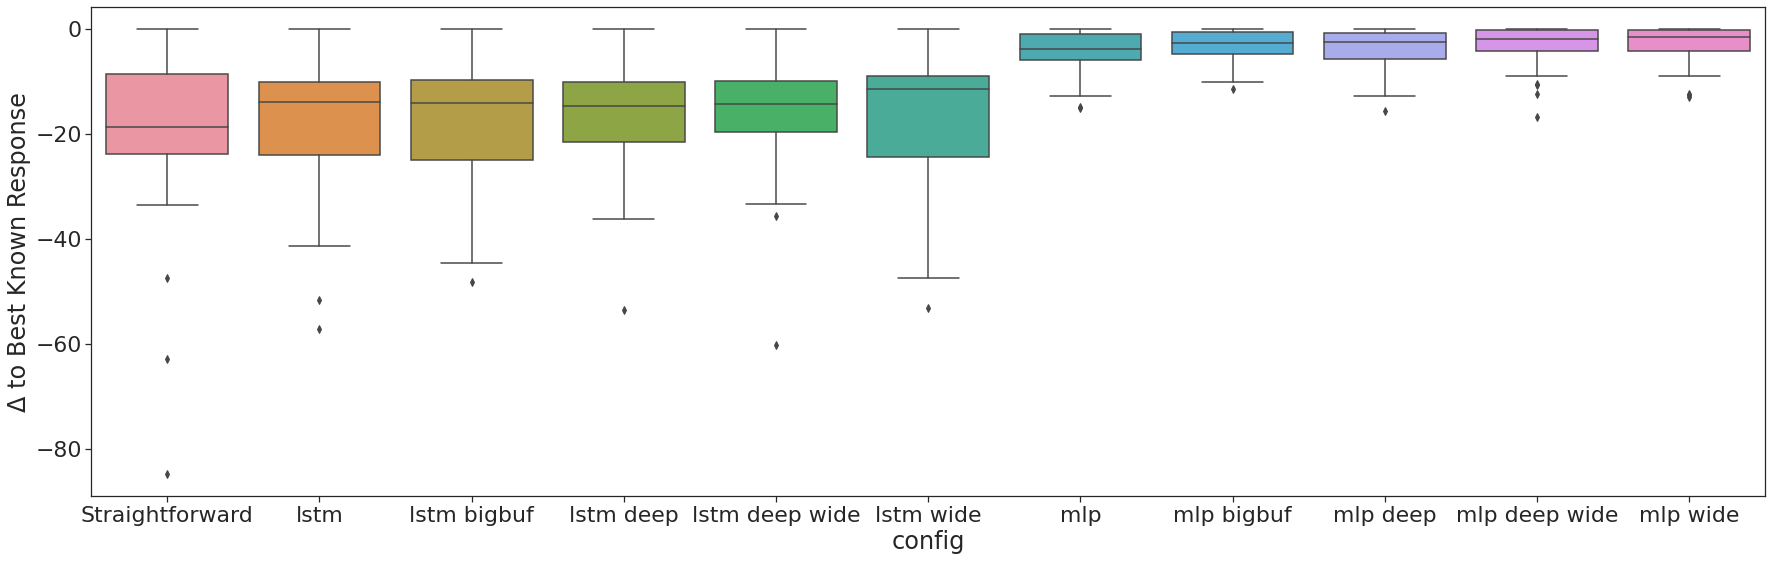

In [95]:
# s = ['_mlp', '_mlp_1', '_mlp_2', '_lstm', '_lstm_1', '_lstm_2', 'Straightforward']
fig = compare_best_responses(master_df)
special_save_fig(fig, "configs.png", fmt=None, dpi=300, tight=True)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.imshow(list(q_network.output_layer.parameters())[0].data)
plt.colorbar()

In [49]:
with open('/shared/outputs/feb7_large/mlp/evaluations/rewards_checkpoint_1500000_checkpoint_1500000_br_0_lstm_test.pkl', 'rb') as f:
    rewards = pickle.load(f)


In [56]:
np.array(rewards['rewards'][0]).mean()

73.84294421199894

KeyError: 0

In [99]:
master_df[['config', 'PositiveRegret']]

,config,PositiveRegret
0,_lstm_bigbuf,0.000000
1,_lstm_deep_wide,46.252726
2,_lstm,44.003469
3,_lstm_wide,0.000000
4,_lstm_deep,0.000000
...,...,...
639,_lstm,32.945366
640,_mlp_bigbuf,13.070642
641,_lstm_deep_wide,0.000000
642,_mlp_deep_wide,26.264261


In [104]:
x = master_df['config'].unique().tolist()
x.remove(None)
x.remove("Straightforward")
x

['_lstm_bigbuf',
 '_lstm_deep_wide',
 '_lstm',
 '_lstm_wide',
 '_lstm_deep',
 '_mlp_bigbuf',
 '_mlp',
 '_mlp_deep',
 '_mlp_wide',
 '_mlp_deep_wide']

In [123]:
for config in x:
    portfolio = [config, 'Straightforward']
    p = master_df.query('config in @portfolio and player == best_responder').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

_lstm_bigbuf 0.4324528005205314
_lstm_deep_wide 0.4505024931843931
_lstm 0.44740768963794014
_lstm_wide 0.4599360757091761
_lstm_deep 0.4459870954591176
_mlp_bigbuf 0.8428019862586521
_mlp 0.8141007204061392
_mlp_deep 0.8437064574988461
_mlp_wide 0.885432232580323
_mlp_deep_wide 0.8560170159119617


In [124]:
y = list(x)
y.remove('_mlp_wide')
for config in y:
    portfolio = [config, '_mlp_wide', 'Straightforward']
    p = master_df.query('config in @portfolio and player == best_responder').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

_lstm_bigbuf 0.885432232580323
_lstm_deep_wide 0.8874252196277056
_lstm 0.885432232580323
_lstm_wide 0.8873849343780861
_lstm_deep 0.885432232580323
_mlp_bigbuf 0.9401835562527187
_mlp 0.931753101935098
_mlp_deep 0.9457998778185708
_mlp_deep_wide 0.9661691464584472


In [125]:
z = list(y)
z.remove('_mlp_deep_wide')
for config in z:
    portfolio = [config, '_mlp_deep_wide', '_mlp_wide', 'Straightforward']
    p = master_df.query('config in @portfolio and player == best_responder').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

_lstm_bigbuf 0.9661691464584472
_lstm_deep_wide 0.9661691464584472
_lstm 0.9661691464584472
_lstm_wide 0.9661691464584472
_lstm_deep 0.9661691464584472
_mlp_bigbuf 0.9864040947087129
_mlp 0.9771964006265554
_mlp_deep 0.9815950484477541
